In [1]:
import sys
import os

# Adicionar o diretório raiz do projeto ao sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Vai um nível acima de "notebooks"
sys.path.append(project_root)

print("Diretório raiz do projeto adicionado ao sys.path:", project_root)

Diretório raiz do projeto adicionado ao sys.path: C:\Users\luisg\Music\ufma\mineracao-de-dados\diabetes-data-mining


In [2]:
# Bibliotecas necessárias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd


In [3]:
# 📂 Carregar o dataset final
final_path = "../dataset/processed/data_final.csv"
df = pd.read_csv(final_path)

# Resumo inicial
print("\n✅ Dataset final carregado!")
print(df.info())



✅ Dataset final carregado!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AQI Value  39408 non-null  float64
 1   Outlier    39408 non-null  bool   
 2   Status     39408 non-null  object 
dtypes: bool(1), float64(1), object(1)
memory usage: 654.4+ KB
None


In [4]:
# Padronizar a variável AQI Value
scaler = StandardScaler()
df["AQI Value (Standardized)"] = scaler.fit_transform(df[["AQI Value"]])

# Verificar estatísticas após padronização
print("\n📊 Estatísticas Após Padronização:")
print(df["AQI Value (Standardized)"].describe())



📊 Estatísticas Após Padronização:
count    3.940800e+04
mean     2.423288e-16
std      1.000013e+00
min     -1.293976e+00
25%     -7.788210e-01
50%     -1.613925e-01
75%      4.787634e-01
max      5.993953e+00
Name: AQI Value (Standardized), dtype: float64


In [5]:
# Normalizar a variável AQI Value
scaler = MinMaxScaler()
df["AQI Value (Normalized)"] = scaler.fit_transform(df[["AQI Value"]])

# Verificar estatísticas após normalização
print("\n📊 Estatísticas Após Normalização:")
print(df["AQI Value (Normalized)"].describe())



📊 Estatísticas Após Normalização:
count    39408.000000
mean         0.177551
std          0.137215
min          0.000000
25%          0.070686
50%          0.155405
75%          0.243243
max          1.000000
Name: AQI Value (Normalized), dtype: float64


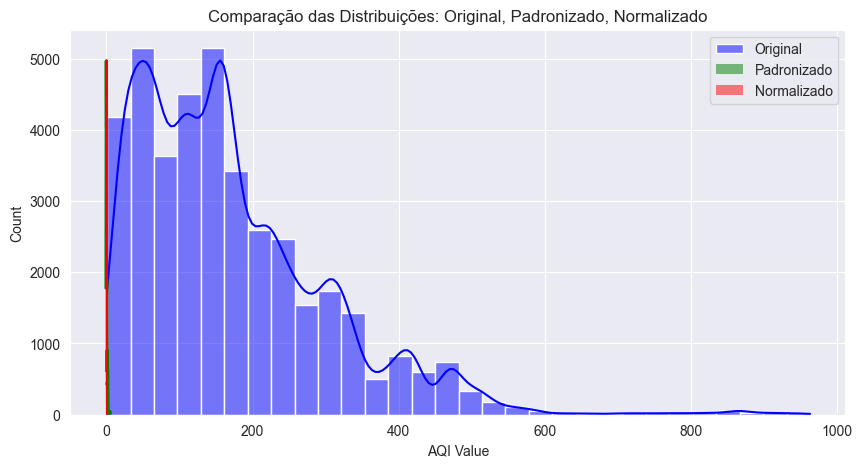

In [6]:
# Visualizar resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Plot das distribuições
plt.figure(figsize=(10, 5))
sns.histplot(df["AQI Value"], kde=True, color="blue", label="Original", bins=30)
sns.histplot(df["AQI Value (Standardized)"], kde=True, color="green", label="Padronizado", bins=30)
sns.histplot(df["AQI Value (Normalized)"], kde=True, color="red", label="Normalizado", bins=30)
plt.legend()
plt.title("Comparação das Distribuições: Original, Padronizado, Normalizado")
plt.show()


In [7]:
# Salvar a versão padronizada
standardized_path = "../dataset/processed/data_standardized.csv"
df[["AQI Value (Standardized)", "Status"]].to_csv(standardized_path, index=False)
print(f"✅ Dataset padronizado salvo em: {standardized_path}")

# Salvar a versão normalizada
normalized_path = "../dataset/processed/data_normalized.csv"
df[["AQI Value (Normalized)", "Status"]].to_csv(normalized_path, index=False)
print(f"✅ Dataset normalizado salvo em: {normalized_path}")


✅ Dataset padronizado salvo em: ../dataset/processed/data_standardized.csv
✅ Dataset normalizado salvo em: ../dataset/processed/data_normalized.csv
